In [2]:
%matplotlib inline
import scanpy as sc
import anndata
import os
from scipy import sparse
import numpy as np
import pandas as pd
sc.settings.verbosity = 3
sc.logging.print_version_and_date()

Running Scanpy 1.9.3, on 2025-03-23 15:45.


In [3]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Data preporcessing

In [4]:
cells_adata_path = (
    "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

adata = sc.read_h5ad(cells_adata_path)

In [5]:
adata = sc.read_h5ad(cells_adata_path)

In [6]:
umi_counts = adata.to_df()
umi_counts

TMEM88B  PLCH2  SMIM1  TNFRSF9  SLC45A1  CA6  SLC2A7  CASZ1  \
id                                                                       
ID_1             0      0      0        0        0    0       0      0   
ID_10            0      0      0        0        0    0       0      0   
ID_100           0      0      0        0        0    0       0      0   
ID_1000          0      0      0        0        0    0       0      0   
ID_1001          0      0      0        0        0    0       0      0   
...            ...    ...    ...      ...      ...  ...     ...    ...   
ID_199362        0      0      0        0        0    0       0      0   
ID_199364        0      0      0        0        0    0       0      0   
ID_199365        0      0      0        0        0    0       0      0   
ID_199366        0      0      0        0        0    0       0      0   
ID_199375        0      0      0        0        0    0       0      0   

           C1orf127  AADACL4  ...  MT-ND1  MT-ND2  MT-CO2  MT-ATP6  MT-CO3  \
id                            ...                                            
ID_1              0        0  ...       0       0       0        0       0   
ID_10             0        0  ...       0       0       0        0       0   
ID_100            0        0  ...       0       0       0        0       0   
ID_1000           0        0  ...       0       0       0        0       0   
ID_1001           0        0  ...       0       0       0        0       0   
...             ...      ...  ...     ...     ...     ...      ...     ...   
ID_199362         0        0  ...       0       0       0        0       0   
ID_199364         0        0  ...       0       0       0        0       0   
ID_199365         0        0  ...       0       0       0        0       0   
ID_199366         0        0  ...       0       0       0        0       0   
ID_199375         0        0  ...       0       0       0        0       0   

           MT-ND3  MT-ND4L  MT-ND5  MT-ND6  MT-CYB  
id                                                  
ID_1            0        0       0       0       0  
ID_10           0        0       0       0       0  
ID_100          0        0       0       0       0  
ID_1000         0        0       0       0       0  
ID_1001         0        0       0       0       0  
...           ...      ...     ...     ...     ...  
ID_199362       0        0       0       0       0  
ID_199364       0        0       0       0       0  
ID_199365       0        0       0       0       0  
ID_199366       0        0       0       0       0  
ID_199375       0        0       0       0       0  

[195853 rows x 1089 columns]

In [7]:
adata.obs["cell_type"]

id
ID_1           cd8+ t cells
ID_10          cd8+ t cells
ID_100                 cms2
ID_1000      myofibroblasts
ID_1001        cd8+ t cells
                  ...      
ID_199362      cd8+ t cells
ID_199364      cd8+ t cells
ID_199365      cd8+ t cells
ID_199366      cd8+ t cells
ID_199375      cd8+ t cells
Name: cell_type, Length: 195853, dtype: category
Categories (33, object): ['cd19+cd20+ b', 'cd4+ t cells', 'cd8+ t cells', 'cdc', ..., 't follicular helper cells', 't helper 17 cells', 'tip-like ecs', 'unknown']

In [8]:
adata_f = adata[~adata.obs['cell_type'].isin(['Endothelial cell', 'Eosinophil/Basophil/Mast']),]
adata_f = adata_f[:1000, :]  # Use only 5000 random cells


computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


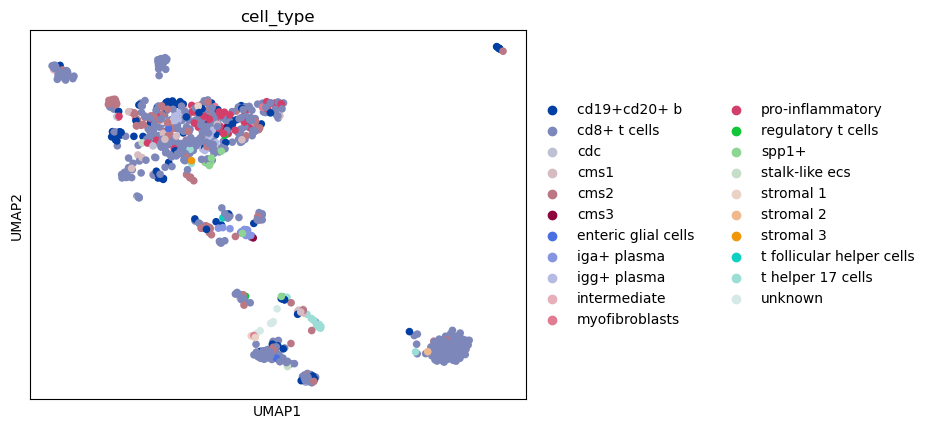

In [9]:
sc.pp.pca(adata_f, n_comps=50)  # Use PCA for dimensionality reduction
sc.pp.neighbors(adata_f, n_neighbors=10, method='umap', use_rep="X_pca")  # Faster graph construction
sc.tl.umap(adata_f)  # Compute UMAP
sc.pl.umap(adata_f, color=['cell_type'])  # Plot UMAP


In [10]:
sc.set_figure_params(dpi=100,dpi_save=500)

In [11]:
print(adata.obs['cell_type'].cat.categories)  # List current categories


Index(['cd19+cd20+ b', 'cd4+ t cells', 'cd8+ t cells', 'cdc', 'cms1', 'cms2',
       'cms3', 'enteric glial cells', 'gamma delta t cells', 'iga+ plasma',
       'igg+ plasma', 'intermediate', 'lymphatic ecs', 'mast cells',
       'mature enterocytes type 1', 'mature enterocytes type 2',
       'myofibroblasts', 'nk cells', 'pericytes', 'pro-inflammatory',
       'proliferating', 'regulatory t cells', 'smooth muscle cells', 'spp1+',
       'stalk-like ecs', 'stem-like/ta', 'stromal 1', 'stromal 2', 'stromal 3',
       't follicular helper cells', 't helper 17 cells', 'tip-like ecs',
       'unknown'],
      dtype='object')


In [12]:
# List of new cell type categories
cell_type_id = [
    'B', 'cycl-B', 'EarlyLymp', 'EarlyMyel', 'Endo', 'E/B/M', 'Ery', 'cycl-Ery', 
    'HSC/MPP', 'Late-Ery', 'MPP', 'Lymp-MPP', 'Myel-MPP', 'Mega', 'ProMega', 'Mono', 
    'neutro-Myel', 'cycl-Myel', 'mono-Myel', 'PreDC', 'cycl-PreDC'
]

# Ensure 'cell_type' is categorical and apply the mapping
category_mapping = {
    'cd19+cd20+ b': 'B', 'cd4+ t cells': 'cycl-B', 'cd8+ t cells': 'EarlyLymp',
    'cdc': 'EarlyMyel', 'cms1': 'Endo', 'cms2': 'E/B/M', 'cms3': 'Ery',
    'enteric glial cells': 'cycl-Ery', 'gamma delta t cells': 'HSC/MPP',
    'iga+ plasma': 'Late-Ery', 'igg+ plasma': 'MPP', 'intermediate': 'Lymp-MPP',
    'lymphatic ecs': 'Myel-MPP', 'mast cells': 'Mega', 'mature enterocytes type 1': 'ProMega',
    'mature enterocytes type 2': 'Mono', 'myofibroblasts': 'neutro-Myel', 'nk cells': 'cycl-Myel',
    'pericytes': 'mono-Myel', 'pro-inflammatory': 'PreDC', 'proliferating': 'cycl-PreDC',
    'regulatory t cells': 'B', 'smooth muscle cells': 'B', 'spp1+': 'B', 'stalk-like ecs': 'B',
    'stem-like/ta': 'B', 'stromal 1': 'B', 'stromal 2': 'B', 'stromal 3': 'B',
    't follicular helper cells': 'B', 't helper 17 cells': 'B', 'tip-like ecs': 'B', 'unknown': 'B'
}


In [13]:
# Apply the mapping directly, ensuring 'cell_type' is categorical
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.obs['cell_type_id'] = adata.obs['cell_type'].map(category_mapping).astype('category')


computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=20
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


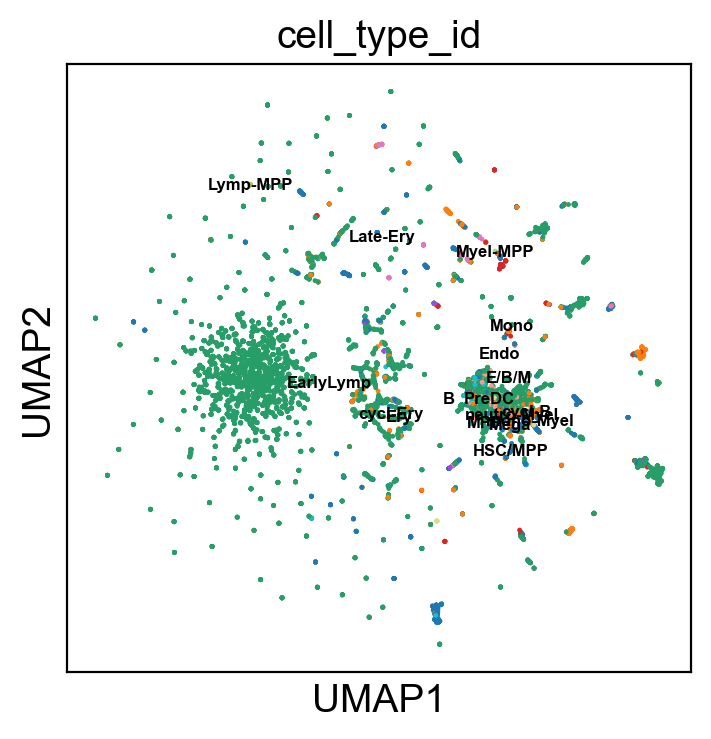

In [14]:
import umap

adata_sampled = adata[adata.obs.sample(frac=0.05).index]  # Use 5% of the data

# Perform PCA with approximate computation (using randomized SVD solver)
sc.pp.pca(adata_sampled, n_comps=20, svd_solver='randomized')

# Calculate neighbors with fewer neighbors (to speed up the computation)
sc.pp.neighbors(adata_sampled, n_neighbors=5, use_rep='X_pca')

# Use UMAP with parallelized computation and fewer neighbors
umap_model = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', n_jobs=-1, random_state=42)
adata_sampled.obsm['X_umap'] = umap_model.fit_transform(adata_sampled.obsm['X_pca'])

# Plot UMAP
sc.pl.umap(adata_sampled, color=['cell_type_id'], legend_loc='on data', legend_fontsize=6, save='_adata_cell_type_id_optimized.pdf')


computing PCA
    with n_comps=50
    finished (0:00:00)


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


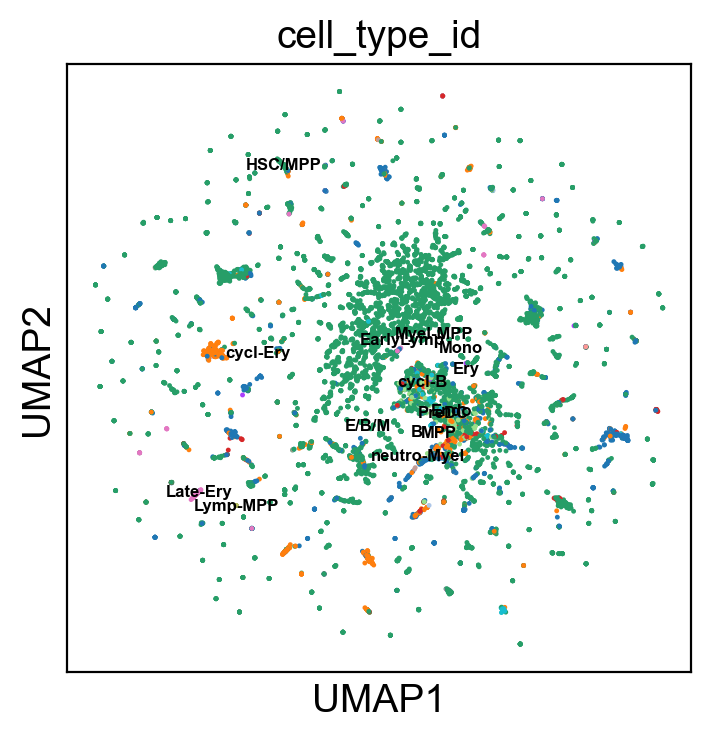

In [15]:
import scanpy as sc

# Downsample the full dataset first (e.g., using 5% of the data for plotting)
adata_sampled = adata[adata.obs.sample(frac=0.05).index]

# Perform PCA on the downsampled dataset
sc.tl.pca(adata_sampled, n_comps=50)  # You can change the number of components as needed

# Perform UMAP with approximation
umap_model = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', n_jobs=-1, random_state=42, n_epochs=100)
adata_sampled.obsm['X_umap'] = umap_model.fit_transform(adata_sampled.obsm['X_pca'])

# Now plot UMAP for the sampled dataset
sc.pl.umap(adata_sampled, color=['cell_type_id'], legend_loc='on data', legend_fontsize=6, save='_adata_cell_type_id_sampled_optimized.pdf')



computing PCA
    with n_comps=10
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


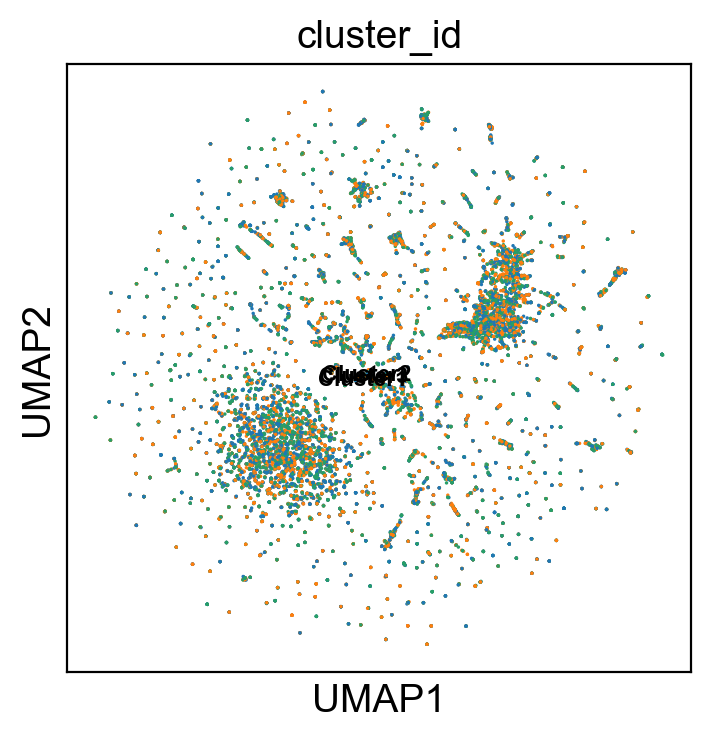

In [16]:
import scanpy as sc
import umap
import numpy as np

adata_sampled = adata[np.random.choice(adata.n_obs, size=int(0.1 * adata.n_obs), replace=False)]

sc.pp.pca(adata_sampled, n_comps=10)  # Reduce PCA components to 5

sc.pp.neighbors(adata_sampled, n_neighbors=5, use_rep='X_pca')

umap_model = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', random_state=42, n_jobs=-1)
adata_sampled.obsm['X_umap'] = umap_model.fit_transform(adata_sampled.obsm['X_pca'])

if 'cluster_id' not in adata_sampled.obs.columns:
    adata_sampled.obs['cluster_id'] = np.random.choice(['Cluster1', 'Cluster2', 'Cluster3'], size=adata_sampled.n_obs)

sc.pl.umap(adata_sampled, color=['cluster_id'], legend_loc='on data', legend_fontsize=8, save='_adata_cluster_id_umap_learn.pdf')


In [17]:
import os

# Ensure the 'write' directory exists
os.makedirs('./write', exist_ok=True)

# Now write the h5ad file
adata.write_h5ad('./write/raw_counts_20250323.h5ad')


In [18]:
adata.X = adata.X.astype(np.float32)

# Now apply normalization
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
filtered out 71426 cells that have less than 1 counts
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [19]:
adata.write_h5ad('./write/raw_counts_20250323.h5ad')

In [20]:
adata = sc.read_h5ad('./write/raw_counts_20250323.h5ad')

In [21]:
adata

AnnData object with n_obs × n_vars = 124427 × 1089
    obs: 'cell_type', 'patch_id', 'cell_type_id', 'n_counts'
    uns: 'log1p'
    obsm: 'spatial', 'stats'

# Illustration of DEGs identification by DEAPLOG

In [22]:
import sys
sys.executable


'c:\\Users\\hosse\\miniconda3\\envs\\deaplog_env_new\\python.exe'

In [23]:
import sympy


In [24]:
import deaplog as dpg

In [25]:
rdata_df = adata.to_df()

In [26]:
rdata_df = adata.to_df()

# Print the gene names (index of the DataFrame corresponds to genes)
print(rdata_df.index)

Index(['ID_10', 'ID_100', 'ID_1000', 'ID_1001', 'ID_1002', 'ID_1003',
       'ID_1004', 'ID_1005', 'ID_1007', 'ID_1008',
       ...
       'ID_196255', 'ID_196956', 'ID_197440', 'ID_197454', 'ID_197493',
       'ID_197512', 'ID_198605', 'ID_198610', 'ID_198906', 'ID_199086'],
      dtype='object', name='id', length=124427)


In [27]:
# Print the gene names (columns of the DataFrame correspond to genes)
print(rdata_df.columns)


Index(['TMEM88B', 'PLCH2', 'SMIM1', 'TNFRSF9', 'SLC45A1', 'CA6', 'SLC2A7',
       'CASZ1', 'C1orf127', 'AADACL4',
       ...
       'MT-ND1', 'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=1089)


In [28]:
# Step 1: Calculate the sum of expression values for each gene across all cells
gene_expression_sum = rdata_df.sum(axis=0)  # Sum across rows (cells) for each gene

# Step 2: Sort the genes by their total expression in descending order
sorted_genes = gene_expression_sum.sort_values(ascending=False)

# Step 3: Select the top 10 dominant genes
top_10_genes = sorted_genes.head(20)

# Print the top 10 genes and their total expression values
print("Top 10 dominant genes with highest total expression:")
print(top_10_genes)


Top 10 dominant genes with highest total expression:
CXCL8      293380.750000
S100A9     223244.468750
SAT1       180358.375000
FTH1       168659.125000
S100A8     138188.859375
G0S2       103122.148438
TMSB4X      97744.828125
LITAF       54974.882812
COL1A1      41735.898438
MT-CYB      37966.417969
MT-CO3      33848.792969
COL3A1      33391.816406
MT-ND2      33307.628906
MT-ND6      32157.125000
MT-ND1      28562.263672
CD74        26798.359375
MT-ND3      26176.839844
MT-CO2      26174.455078
MT-ND5      25660.445312
MT-ND4L     25542.642578
dtype: float32


In [29]:
import sys
sys.path.append('/path/to/plogs_directory')
import plogs



In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Define a simple power law or logistic function to fit the data
def power_law(x, a, b):
    return a * np.power(x, b)

# Function to get highly expressed cells for each gene
def get_highly_cells_for_each_gene(rdata_df, gene, power=11):
    """
    This function filters cells with gene expression values greater than a threshold
    calculated as the mean plus a power of the standard deviation for the given gene.
    """
    mean_expr = rdata_df[gene].mean()
    std_expr = rdata_df[gene].std()
    threshold = mean_expr + (power * std_expr)
    highly_expressed_cells = rdata_df[rdata_df[gene] > threshold].index.tolist()
    return highly_expressed_cells

# List of top 10 dominant genes with highest total expression
top_10_genes = ['CXCL8', 'S100A9', 'SAT1', 'FTH1', 'S100A8', 'G0S2', 'TMSB4X', 'LITAF', 'COL1A1', 'MT-CYB']

# Loop through the top 10 dominant genes
for g in top_10_genes:
    
    # Get highly expressed cells for the gene using the previously defined function
    g_highly_cells = get_highly_cells_for_each_gene(rdata_df=rdata_df, gene=g, power=11)
    
    # Extract gene expression data and filter out values <= 0
    gene_list = rdata_df[g]
    gene_filter = gene_list.loc[gene_list > 0]
    gene_sort_df_filter = gene_filter.sort_values(ascending=False)
    
    # Prepare the data for curve fitting
    x_data = np.arange(1, len(gene_sort_df_filter) + 1)
    y_data = gene_sort_df_filter.values

    # Fit the curve to the data using the power law
    popt, _ = curve_fit(power_law, x_data, y_data, maxfev=5000)
    a, b = popt  # Extract fitted parameters

    # Plot the data and the fitted curve
    plt.plot(x_data, y_data, label='Data', color='blue')
    plt.plot(x_data, power_law(x_data, *popt), label=f'Fitted curve: a={a:.2f}, b={b:.2f}', color='red')
    plt.xlabel('Index of ranked cells')
    plt.ylabel(f'Expression level of {g}')
    
    # Add a vertical line for the threshold of highly expressed cells
    plt.vlines(x=len(g_highly_cells), ymin=0, ymax=gene_sort_df_filter.max() - 0.5,
               colors='black', linestyles='dashed')
    plt.text(x=len(g_highly_cells), y=gene_sort_df_filter.max() - 0.5,
             s=f'x={len(g_highly_cells)}')

    # Apply the correct grid function
    plt.grid(True)
    
    # Save the plot
    plt.legend()
    plt.savefig(f'./figures/draw_fitted_curve_adata_{g}_D11_20220108.pdf')
    plt.close()
    
    # Update 'HighlyCells' annotation in adata
    adata.obs[g + 'HighlyCells'] = 'False'
    gHighlyCells_df = pd.DataFrame(adata.obs[g + 'HighlyCells'])
    
    # Update the 'HighlyCells' status for the highly expressed cells
    gHighlyCells_df.loc[gHighlyCells_df.index.isin(g_highly_cells), [g + 'HighlyCells']] = 'True'
    adata.obs[g + 'HighlyCells'] = gHighlyCells_df[g + 'HighlyCells']

    # Set categorical data type for the 'HighlyCells' column
    cat_dtype = pd.api.types.CategoricalDtype(categories=['True', 'False'], ordered=True)
    adata.obs[g + 'HighlyCells'] = adata.obs[g + 'HighlyCells'].astype(cat_dtype)

    # Define color scheme for highly expressed cells
    adata.uns[g + 'HighlyCells_colors'] = ['#ff3366', '#cccccc']


**You don need run 4 genes**

In [ ]:
for g in ['GATA3','ZNF683','GAS7','PAX5']:
    g_highly_cells = plogs.get_highly_cells_for_each_gene(rdata_df=rdata_df,gene=g,power=11)
    gene_list = rdata_df[g]
    gene_filter = gene_list.loc[gene_list>0,]
    gene_sort_df_filter = gene_filter.sort_values(ascending=False)
    x1 = plogs.draw_fitted_curve(gene_sort_df_filter,power=11)
    plt.xlabel(xlabel='Index of ranked cells')
    plt.ylabel(ylabel='Expression level of '+g)
    plt.vlines(x=len(g_highly_cells[0][g]),ymin=0,ymax=gene_sort_df_filter.max()-0.5,
               colors='black',linestyles='dashed')
    plt.text(x=len(g_highly_cells[0][g]),y=gene_sort_df_filter.max()-0.5,
             s='x='+str(len(g_highly_cells[0][g])))
    plt.grid(b='')
    plt.savefig('./figures/draw_fitted_curve_adata_'+g+'_D11_20220108.pdf')
    plt.close()
    adata.obs[g+'HighlyCells'] = 'False'

    gHighlyCells_df = pd.DataFrame(adata.obs[g+'HighlyCells'])

    gHighlyCells_df.loc[gHighlyCells_df.index.isin(g_highly_cells[0][g]),[g+'HighlyCells']]='True'

    adata.obs[g+'HighlyCells'] = gHighlyCells_df[g+'HighlyCells']

    cat_dtype = pd.api.types.CategoricalDtype(categories=['True','False'], ordered=True)
    adata.obs[g+'HighlyCells'] = adata.obs[g+'HighlyCells'].astype(cat_dtype)

    adata.uns[g+'HighlyCells_colors']=['#ff3366','#cccccc']

computing PCA
    with n_comps=5
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


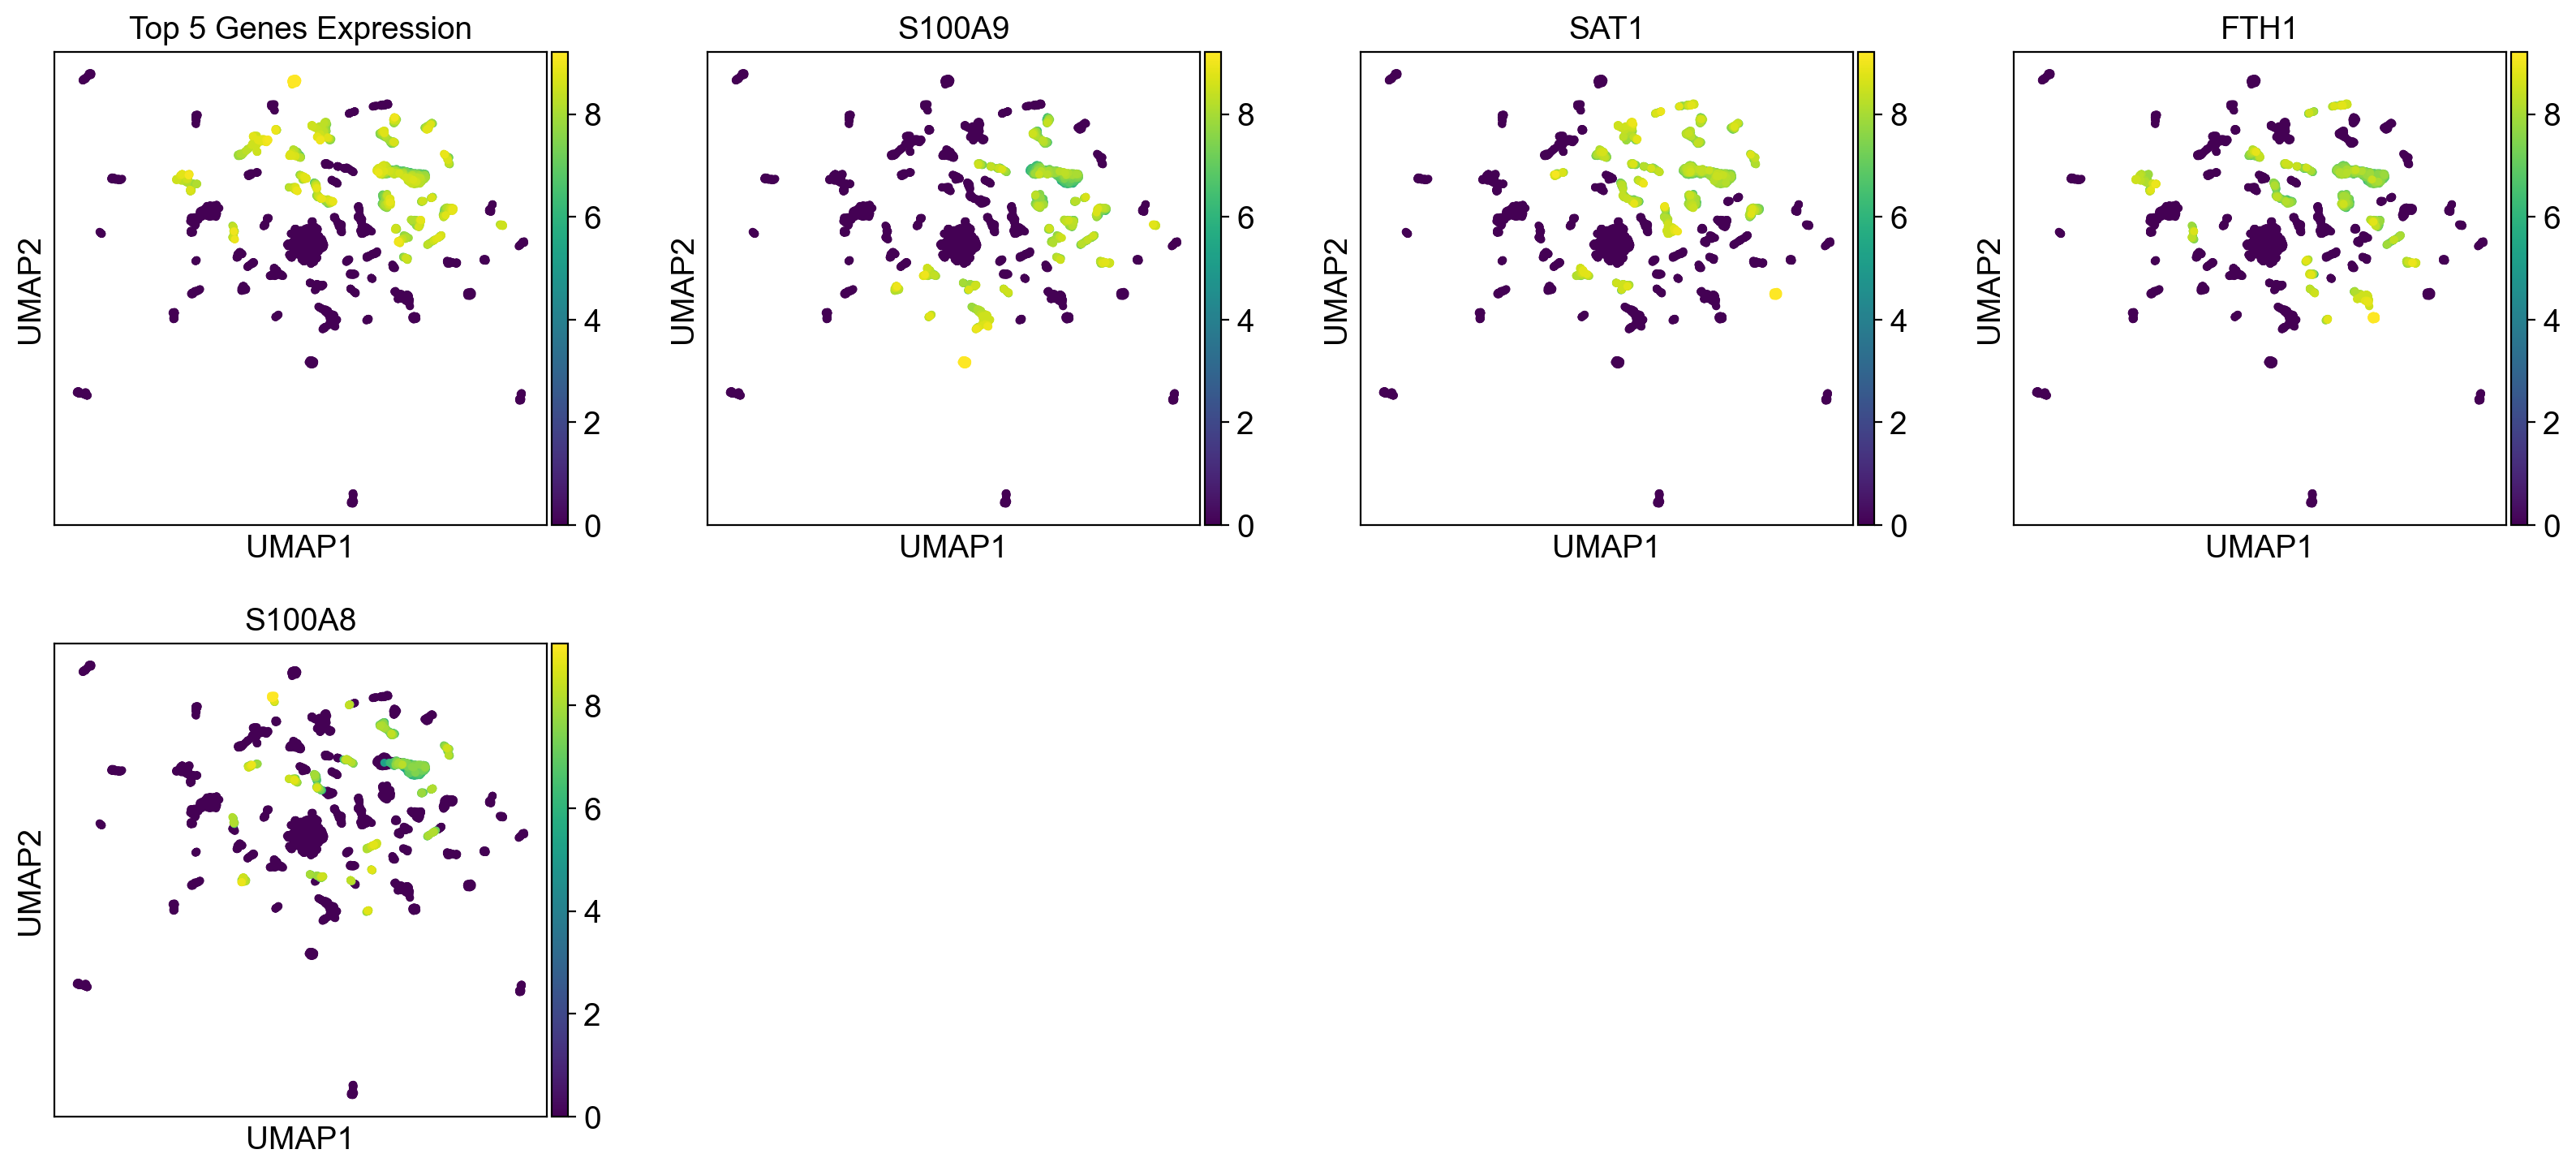

In [37]:
import scanpy as sc

# Take a subset of the data for faster computation (first 5000 cells)
adata_subset = adata[:5000, :]

# Step 1: Compute PCA on the subset of data
sc.pp.pca(adata_subset, n_comps=5)

# Step 2: Compute neighbors using the PCA representation
sc.pp.neighbors(adata_subset, n_neighbors=15, use_rep='X_pca')  # Adjust n_neighbors for better graph density

# Step 3: Compute UMAP (without the need to pass n_neighbors here)
sc.tl.umap(adata_subset)

# Step 4: Visualize the UMAP plot with specific genes
gene_color = ['CXCL8', 'S100A9', 'SAT1', 'FTH1', 'S100A8']

# Plot UMAP with top 5 genes and visualize expression
sc.pl.umap(adata_subset,
           color=gene_color,  # Genes to visualize
           size=50,            # Adjust size of points for better visibility
           title="Top 5 Genes Expression",  # Title of the plot
           legend_loc='on data',  # Position of the legend on the data
           save='_umap_plot_top_5_genes_optimized.pdf')  # Save the plot as PDF


In [40]:
import pandas as pd
import scipy.stats as stats

# Define the Fisher's Exact Test function
def Fisher_test_for_each_gene(rdata_df, cell_sets, num_allCells, gene, power=8):
    """
    Perform Fisher's exact test for a given gene to assess enrichment of expression in cell sets.
    
    Parameters:
    - rdata_df: DataFrame containing gene expression data
    - cell_sets: Dictionary of cell types and the indices of cells belonging to them
    - num_allCells: Total number of cells in the dataset
    - gene: Gene to analyze (as a string)
    - power: Optional, adjustment for statistical power
    
    Returns:
    - gene_ratio: Proportion of highly expressed cells for each cell type
    - gene_pv: p-values for Fisher's exact test
    - gene_qv: q-values (adjusted p-values for multiple testing)
    - gene_score: Fisher's exact test statistic
    - gene_means: Mean expression level of the gene across cell types
    """
    gene_data = rdata_df[gene]
    
    gene_ratio = {}
    gene_pv = {}
    gene_qv = {}
    gene_score = {}
    gene_means = {}
    
    # Loop through each cell type
    for ct, cells in cell_sets.items():
        # Identify the highly expressed cells (you can adjust this threshold)
        high_expression_cells = gene_data[cells] > 0  # Modify the threshold as needed
        
        # Contingency table for Fisher's Exact Test
        # Ensure that the contingency table does not contain negative values
        num_high_expr = sum(high_expression_cells)
        num_low_expr = len(high_expression_cells) - num_high_expr
        num_cells_in_type = len(cells)
        num_high_expr_type = sum(high_expression_cells)
        num_low_expr_type = num_cells_in_type - num_high_expr_type
        
        contingency_table = [
            [num_high_expr_type, num_low_expr_type],
            [num_high_expr, num_low_expr]
        ]
        
        # Check if all values in the table are non-negative
        if any(val < 0 for row in contingency_table for val in row):
            continue  # Skip if the table has negative values
        
        # Fisher's exact test
        _, p_value = stats.fisher_exact(contingency_table)
        
        # Calculate the ratio and mean for the gene
        gene_ratio[ct] = num_high_expr / len(cells)
        gene_pv[ct] = p_value
        gene_qv[ct] = p_value  # You can apply an adjustment for multiple testing here (e.g., FDR)
        gene_score[ct] = p_value  # Score can be based on p-value, but you may define your own metric
        gene_means[ct] = gene_data[cells].mean()
    
    return gene_ratio, gene_pv, gene_qv, gene_score, gene_means

# Prepare cell type data
num_allCells = len(adata.obs_names)
print('Structuring the cell type sets for enrichment analysis...')
adata_cell_type_df = pd.DataFrame(adata.obs['cell_type_id'])
cell_type_index = pd.Categorical(adata.obs['cell_type_id']).categories
cell_sets = {ct: list(adata_cell_type_df.loc[adata_cell_type_df['cell_type_id'] == ct, :].index) for ct in cell_type_index}

# Initialize a DataFrame to store the Fisher test results
all_gene_Fisher_r = pd.DataFrame(index=cell_type_index)

# List of genes to analyze
genes_to_analyze = ['CXCL8', 'S100A9', 'SAT1', 'FTH1', 'S100A8', 'G0S2', 'TMSB4X', 'LITAF', 'COL1A1', 'MT-CYB']

# Loop through each gene and compute Fisher's test for each cell type
for g in genes_to_analyze:
    # Run Fisher's test for the current gene
    gene_ratio, gene_pv, gene_qv, gene_score, gene_means = Fisher_test_for_each_gene(
        rdata_df=rdata_df,
        cell_sets=cell_sets,
        num_allCells=num_allCells,
        gene=g,
        power=8
    )
    
    # Create a DataFrame to store the results of the current gene
    Fisher_r = pd.DataFrame({
        f'{g}_ratio': gene_ratio,
        f'{g}_pValue': gene_pv,
        f'{g}_qValue': gene_qv,
        f'{g}_score': gene_score
    })
    
    # Join the current gene results with the all_gene_Fisher_r DataFrame
    all_gene_Fisher_r = all_gene_Fisher_r.join(Fisher_r)

# Display the final results
print(all_gene_Fisher_r)


Structuring the cell type sets for enrichment analysis...
             CXCL8_ratio  CXCL8_pValue  CXCL8_qValue  CXCL8_score  \
B               0.128023           1.0           1.0          1.0   
E/B/M           0.170078           1.0           1.0          1.0   
EarlyLymp       0.332405           1.0           1.0          1.0   
EarlyMyel       0.200000           1.0           1.0          1.0   
Endo            0.418355           1.0           1.0          1.0   
Ery             0.094427           1.0           1.0          1.0   
HSC/MPP         0.250000           1.0           1.0          1.0   
Late-Ery        0.003758           1.0           1.0          1.0   
Lymp-MPP        0.076628           1.0           1.0          1.0   
MPP             0.789633           1.0           1.0          1.0   
Mega            0.000000           1.0           1.0          1.0   
Mono            0.305556           1.0           1.0          1.0   
Myel-MPP        0.045455           1.0       

In [41]:
all_gene_Fisher_r.to_csv('./write/adata_Genes_HighlyCells_Fisher_r_D11_20250323.csv')

In [42]:
all_gene_Fisher_r

CXCL8_ratio  CXCL8_pValue  CXCL8_qValue  CXCL8_score  \
B               0.128023           1.0           1.0          1.0   
E/B/M           0.170078           1.0           1.0          1.0   
EarlyLymp       0.332405           1.0           1.0          1.0   
EarlyMyel       0.200000           1.0           1.0          1.0   
Endo            0.418355           1.0           1.0          1.0   
Ery             0.094427           1.0           1.0          1.0   
HSC/MPP         0.250000           1.0           1.0          1.0   
Late-Ery        0.003758           1.0           1.0          1.0   
Lymp-MPP        0.076628           1.0           1.0          1.0   
MPP             0.789633           1.0           1.0          1.0   
Mega            0.000000           1.0           1.0          1.0   
Mono            0.305556           1.0           1.0          1.0   
Myel-MPP        0.045455           1.0           1.0          1.0   
PreDC           0.794697           1.0           1.0          1.0   
ProMega         0.400000           1.0           1.0          1.0   
cycl-B          0.529412           1.0           1.0          1.0   
cycl-Ery        0.132184           1.0           1.0          1.0   
cycl-Myel       0.000000           1.0           1.0          1.0   
cycl-PreDC      0.000000           1.0           1.0          1.0   
mono-Myel       0.222222           1.0           1.0          1.0   
neutro-Myel     0.190635           1.0           1.0          1.0   

             S100A9_ratio  S100A9_pValue  S100A9_qValue  S100A9_score  \
B                0.121726            1.0            1.0           1.0   
E/B/M            0.093982            1.0            1.0           1.0   
EarlyLymp        0.291920            1.0            1.0           1.0   
EarlyMyel        0.000000            1.0            1.0           1.0   
Endo             0.021454            1.0            1.0           1.0   
Ery              0.105263            1.0            1.0           1.0   
HSC/MPP          0.375000            1.0            1.0           1.0   
Late-Ery         0.012682            1.0            1.0           1.0   
Lymp-MPP         0.030651            1.0            1.0           1.0   
MPP              0.007046            1.0            1.0           1.0   
Mega             0.000000            1.0            1.0           1.0   
Mono             0.027778            1.0            1.0           1.0   
Myel-MPP         0.045455            1.0            1.0           1.0   
PreDC            0.679791            1.0            1.0           1.0   
ProMega          0.600000            1.0            1.0           1.0   
cycl-B           0.735294            1.0            1.0           1.0   
cycl-Ery         0.057471            1.0            1.0           1.0   
cycl-Myel        0.000000            1.0            1.0           1.0   
cycl-PreDC       0.750000            1.0            1.0           1.0   
mono-Myel        0.333333            1.0            1.0           1.0   
neutro-Myel      0.260870            1.0            1.0           1.0   

             SAT1_ratio  SAT1_pValue  ...  LITAF_qValue  LITAF_score  \
B              0.284561          1.0  ...           1.0          1.0   
E/B/M          0.179871          1.0  ...           1.0          1.0   
EarlyLymp      0.131344          1.0  ...           1.0          1.0   
EarlyMyel      0.400000          1.0  ...           1.0          1.0   
Endo           0.098927          1.0  ...           1.0          1.0   
Ery            0.119195          1.0  ...           1.0          1.0   
HSC/MPP        0.062500          1.0  ...           1.0          1.0   
Late-Ery       0.010333          1.0  ...           1.0          1.0   
Lymp-MPP       0.007663          1.0  ...           1.0          1.0   
MPP            0.728234          1.0  ...           1.0          1.0   
Mega           0.750000          1.0  ...           1.0          1.0   
Mono           0.027778

In [51]:
print(all_gene_Fisher_r.columns)


Index(['CXCL8_ratio', 'CXCL8_pValue', 'CXCL8_qValue', 'CXCL8_score',
       'S100A9_ratio', 'S100A9_pValue', 'S100A9_qValue', 'S100A9_score',
       'SAT1_ratio', 'SAT1_pValue', 'SAT1_qValue', 'SAT1_score', 'FTH1_ratio',
       'FTH1_pValue', 'FTH1_qValue', 'FTH1_score', 'S100A8_ratio',
       'S100A8_pValue', 'S100A8_qValue', 'S100A8_score', 'G0S2_ratio',
       'G0S2_pValue', 'G0S2_qValue', 'G0S2_score', 'TMSB4X_ratio',
       'TMSB4X_pValue', 'TMSB4X_qValue', 'TMSB4X_score', 'LITAF_ratio',
       'LITAF_pValue', 'LITAF_qValue', 'LITAF_score', 'COL1A1_ratio',
       'COL1A1_pValue', 'COL1A1_qValue', 'COL1A1_score', 'MT-CYB_ratio',
       'MT-CYB_pValue', 'MT-CYB_qValue', 'MT-CYB_score'],
      dtype='object')


In [67]:
import scanpy as sc
import numpy as np

# Number of cells you want to keep (e.g., 1% of the total cells)
n_cells = int(adata.n_obs * 0.01)  # 1% of the total cells, change as needed

# Randomly sample n_cells from the dataset
adata_subsampled = adata[np.random.choice(adata.n_obs, n_cells, replace=False), :]

# Preprocessing: Apply PCA to reduce dimensionality before UMAP
sc.tl.pca(adata_subsampled, svd_solver='arpack')

# Set UMAP parameters globally (before running UMAP)
sc.settings.set_figure_params(dpi=200, figsize=(6, 6))  # Set figure size and DPI
sc.pp.neighbors(adata_subsampled, n_neighbors=10, use_rep='X_pca')  # Apply PCA for neighbor calculation

# Run UMAP on the PCA-reduced data
sc.tl.umap(adata_subsampled)

# Define the genes of interest
genes_of_interest = [
    'CXCL8', 'S100A9', 'SAT1', 'FTH1', 'S100A8', 'G0S2', 
    'TMSB4X', 'LITAF', 'COL1A1', 'MT-CYB'
]

# Create a UMAP plot based on the modified gene list
sc.pl.umap(
    adata_subsampled,
    color=genes_of_interest,  # Use the genes you are interested in
    alpha=0.5,                # Set the transparency of the points
    cmap='viridis_r',         # Use the 'viridis' colormap, reverse it with '_r' if needed
    # Uncomment to save the figure
    # save='_adata_Genes_HighlyCells_expr_20211110.pdf'
)


computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


# identifying DEGs by deaplog

In [77]:
#import deaplog as dpg
markers_m = dpg.deaplog.get_DEG_multi(rdata=adata,adata=adata,group_key='cell_type_id',
                               power=11)
adata.uns['markers_m_DEAPLOG'] = markers_m

get the raw data frame...
struct the cell type sets for enrichment analysis...
Fisher_test_for_each_gene...
whole  1000  genes have been done.
merge differentially expressed genes...
Done!


In [69]:
markers_m.to_csv('./write/adata_markers_m_by_DEAPLOG_D11_20250323.csv')

In [70]:
markers_m

cell_type gene_name     ratio        p_value        q_value  \
0              B   TNFRSF9  1.000000   5.258492e-06   1.104283e-04   
1              B      TPH1  1.000000   7.884309e-19   1.655705e-17   
2              B       ELN  1.000000   2.871628e-08   6.030419e-07   
3              B     FABP4  1.000000   1.275333e-25   2.678199e-24   
4              B     MFAP4  1.000000   1.387580e-19   2.913917e-18   
..           ...       ...       ...            ...            ...   
417          MPP    EIF4G2  0.833333   6.117780e-09   1.284734e-07   
418     cycl-Ery     CMTM5  1.000000   1.657614e-26   3.480989e-25   
419     cycl-Ery      MYOT  1.000000   1.657614e-26   3.480989e-25   
420  neutro-Myel     ACTA2  0.928571   1.152346e-58   2.419926e-57   
421  neutro-Myel       BGN  0.969697  1.422768e-221  2.987812e-220   

          score  mean_exValue  
0      0.221841      9.210441  
1      0.760739      9.210441  
2      0.316927      9.210441  
3      1.046118      9.210441  
4      0.792445      9.210440  
..          ...           ...  
417    3.132879      9.094933  
418  136.465470      9.210441  
419  136.465470      9.210441  
420   81.972370      9.111434  
421  318.518375      8.894231  

[422 rows x 7 columns]

get the raw data frame...
struct the cell type sets for enrichment analysis...
Fisher_test_for_each_gene...
whole  1000  genes have been done.
merge differentially expressed genes...
Done!
computing PCA
    with n_comps=50
    finished (0:00:04)


c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\hosse\miniconda3\envs\deaplog_env_new\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


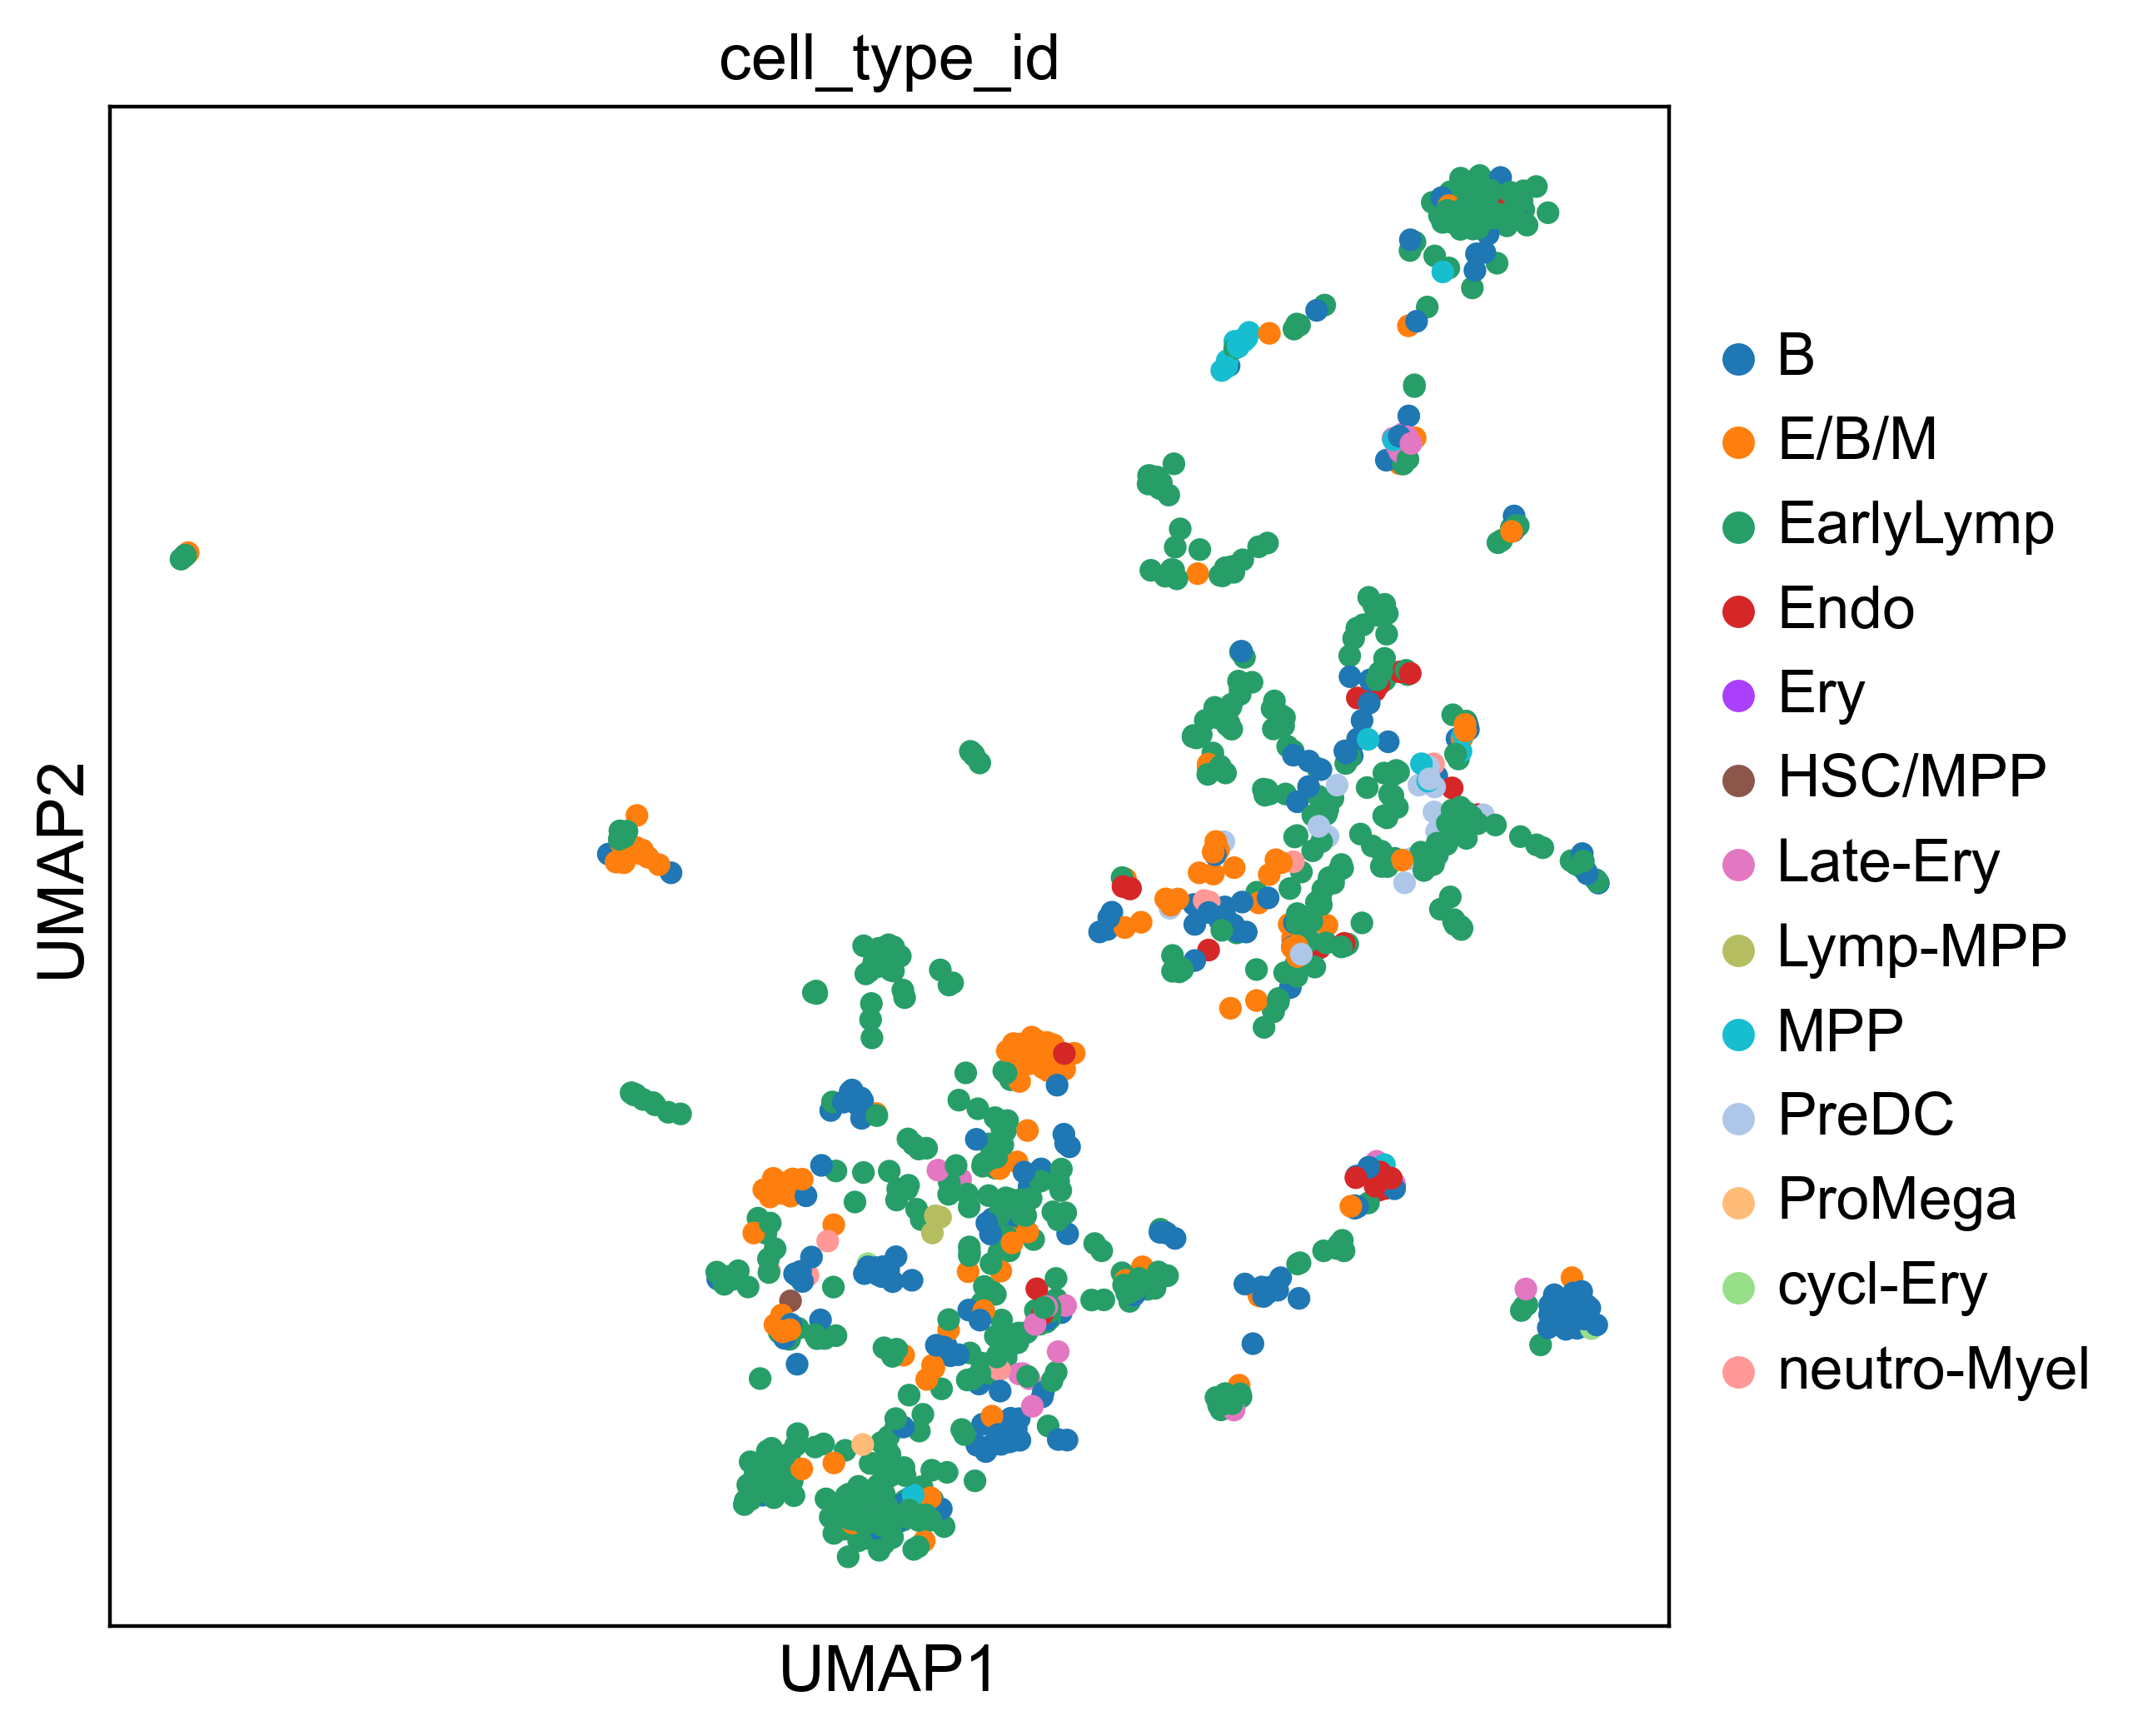

In [85]:
import deaplog as dpg
import scanpy as sc
import numpy as np
from sklearn.decomposition import PCA
import umap

# Cell 1: DEAPLOG marker identification
markers_m = dpg.deaplog.get_DEG_multi(rdata=adata, adata=adata, group_key='cell_type_id', power=11)
adata.uns['markers_m_DEAPLOG'] = markers_m

# Cell 2: Save DEAPLOG markers to CSV
markers_m.to_csv('./write/adata_markers_m_by_DEAPLOG_D11_20250323.csv')

# Cell 3: Subsample 1% of the data (adjust this value if necessary)
n_cells = int(adata.n_obs * 0.01)  # You can change this value (0.001 for 0.1%, for example)
adata_subsampled = adata[np.random.choice(adata.n_obs, n_cells, replace=False), :]

# Run PCA on the entire dataset before subsampling (to reduce dimensions for faster UMAP)
sc.tl.pca(adata, n_comps=50)  # Use more components for better reduction

# Now subsample the data (after PCA)
adata_subsampled = adata[np.random.choice(adata.n_obs, n_cells, replace=False), :]

# Run UMAP on PCA-reduced data using the 'umap-learn' library for better performance
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='euclidean', n_jobs=-1, init='random', random_state=42)
umap_embeddings = umap_model.fit_transform(adata_subsampled.X)  # Run UMAP on the data matrix

# Store UMAP embeddings in adata
adata_subsampled.obsm['X_umap'] = umap_embeddings

# Now, plot UMAP with color by 'cell_type_id'
sc.pl.umap(
    adata_subsampled,
    color=['cell_type_id'],  # Use 'cell_type_id' for coloring
    cmap='viridis_r',        # 'viridis_r' colormap
    save='adata_cell_type_id_subsampled_20250323.pdf'  # Save the plot as PDF
)


In [87]:
print(adata.obs.columns)


Index(['cell_type', 'patch_id', 'cell_type_id', 'n_counts', 'CXCL8HighlyCells',
       'S100A9HighlyCells', 'SAT1HighlyCells', 'FTH1HighlyCells',
       'S100A8HighlyCells', 'G0S2HighlyCells', 'TMSB4XHighlyCells',
       'LITAFHighlyCells', 'COL1A1HighlyCells', 'MT-CYBHighlyCells'],
      dtype='object')


In [88]:
print(adata.obs['cell_type_id'].cat.categories)  # If 'cell_type_id' is categorical
# or
print(adata.obs['cell_type_id'].unique())  # If it's stored as a non-categorical array


Index(['B', 'E/B/M', 'EarlyLymp', 'EarlyMyel', 'Endo', 'Ery', 'HSC/MPP',
       'Late-Ery', 'Lymp-MPP', 'MPP', 'Mega', 'Mono', 'Myel-MPP', 'PreDC',
       'ProMega', 'cycl-B', 'cycl-Ery', 'cycl-Myel', 'cycl-PreDC', 'mono-Myel',
       'neutro-Myel'],
      dtype='object')
['EarlyLymp', 'E/B/M', 'neutro-Myel', 'B', 'Endo', ..., 'mono-Myel', 'Mega', 'Myel-MPP', 'ProMega', 'cycl-Myel']
Length: 21
Categories (21, object): ['B', 'E/B/M', 'EarlyLymp', 'EarlyMyel', ..., 'cycl-Myel', 'cycl-PreDC', 'mono-Myel', 'neutro-Myel']


In [94]:
# Subsample 1% of the data for faster processing (adjust this percentage as needed)
n_cells = int(adata.n_obs * 0.01)  # You can change 0.01 to a smaller or larger value
adata_subsampled = adata[np.random.choice(adata.n_obs, n_cells, replace=False), :]

# Initialize an empty list to store marker genes
marker_genes = []

# Loop through each cell type in the 'cell_type_id' category of adata.obs
for ct in adata_subsampled.obs['cell_type_id'].cat.categories:
    # Extract data for the current cell type from the subsampled adata
    cell_type_data = adata_subsampled[adata_subsampled.obs['cell_type_id'] == ct]
    
    # Initialize a list to store genes for the current cell type
    gene_data = []
    
    # Check if adata.raw exists, if not, use adata.X
    if adata.raw is not None:
        expression_data = cell_type_data.raw.X
    else:
        expression_data = cell_type_data.X
    
    # Loop through each gene in the dataset
    for gene in adata_subsampled.var_names:
        # Get the mean expression for the gene in the current cell type
        mean_expression_cell_type = expression_data[:, adata_subsampled.var_names.get_loc(gene)].mean()
        
        # Get the mean expression of the same gene in all other cell types
        other_cell_type_data = adata_subsampled[adata_subsampled.obs['cell_type_id'] != ct]
        
        # Check if adata.raw exists for the other cell types, if not, use adata.X
        if adata.raw is not None:
            other_expression_data = other_cell_type_data.raw.X
        else:
            other_expression_data = other_cell_type_data.X
        
        mean_expression_other_types = other_expression_data[:, adata_subsampled.var_names.get_loc(gene)].mean()
        
        # Calculate the ratio of expression (gene expression in the current cell type / gene expression in all other cell types)
        ratio = mean_expression_cell_type / mean_expression_other_types
        
        # Calculate the score (log2 fold change between the cell types)
        score = np.log2(mean_expression_cell_type / mean_expression_other_types)  # Fold change score
        
        # Store the gene data (cell type, gene name, ratio, and score)
        gene_data.append({
            'cell_type': ct,
            'gene_name': gene,
            'ratio': ratio,
            'score': score
        })
    
    # Convert the gene data for the current cell type into a DataFrame
    gene_data_df = pd.DataFrame(gene_data)
    
    # Filter by ratio > 0.5 and sort by score
    filtered_genes = gene_data_df.loc[gene_data_df['ratio'] > 0.5].sort_values(by='score', ascending=False)
    
    # Take the top 50 genes and add them to the marker_genes list
    top_genes = filtered_genes.head(10)
    marker_genes.extend(top_genes['gene_name'].tolist())

# Print the final list of marker genes
print("List of top marker genes:")
print(marker_genes)

# Optionally, save the list to a CSV file
marker_genes_df = pd.DataFrame(marker_genes, columns=["gene_name"])
marker_genes_df.to_csv('./write/adata_marker_genes.csv', index=False)


C:\Users\hosse\AppData\Local\Temp\ipykernel_15800\1612300452.py:42: RuntimeWarning: divide by zero encountered in log2
  score = np.log2(mean_expression_cell_type / mean_expression_other_types)  # Fold change score
C:\Users\hosse\AppData\Local\Temp\ipykernel_15800\1612300452.py:39: RuntimeWarning: divide by zero encountered in divide
  ratio = mean_expression_cell_type / mean_expression_other_types
C:\Users\hosse\AppData\Local\Temp\ipykernel_15800\1612300452.py:42: RuntimeWarning: divide by zero encountered in divide
  score = np.log2(mean_expression_cell_type / mean_expression_other_types)  # Fold change score
C:\Users\hosse\AppData\Local\Temp\ipykernel_15800\1612300452.py:39: RuntimeWarning: invalid value encountered in divide
  ratio = mean_expression_cell_type / mean_expression_other_types
C:\Users\hosse\AppData\Local\Temp\ipykernel_15800\1612300452.py:42: RuntimeWarning: invalid value encountered in divide
  score = np.log2(mean_expression_cell_type / mean_expression_other_types) 

List of top marker genes:
['TNFRSF9', 'SPINK5', 'PDE6H', 'FGF6', 'POU2AF1', 'TRIM3', 'R3HCC1L', 'MKX', 'TMEM210', 'ENG', 'TMEM88B', 'TSNARE1', 'DPEP1', 'SMIM22', 'PIF1', 'C2CD4A', 'CDX2', 'GYPA', 'CPE', 'FOXN4', 'PLCH2', 'ZNF585A', 'GFRA1', 'SMIM1', 'PITX3', 'CYP2C9', 'OPN4', 'TMEM145', 'SFTPA1', 'IGSF23', 'BIK', 'SMYD3', 'CACNG6', 'HIF3A', 'FZD5', 'THAP8', 'TGIF1', 'TONSL', 'SNCG', 'PVALEF', 'LCN2', 'POLR3G', 'REG4', 'ZNF599', 'OR7A10', 'KRTAP3-1', 'GCAT', 'PLA2G2C', 'GRM5', 'CD2', 'TRNP1', 'GUCA2A', 'CST9', 'ADCY8', 'LRRC38', 'GPR180', 'AQP3', 'MT-ND3', 'RTL4', 'IKZF2', 'LGALS4', 'WFDC2', 'AMPH', 'MT-ND5', 'MAGEA9B', 'NRGN', 'XRRA1', 'DNAAF1', 'TAFA1', 'NDNF', 'ZBTB49', 'BTG4', 'MYH15', 'OR51E2', 'BACE2', 'CSPG5', 'EFCAB13', 'ADAMTS3', 'S100A4', 'ACTA2', 'MAGEC2', 'MCAM', 'JUNB', 'MT-CO2', 'CGREF1', 'CD55', 'MT-ND3', 'TMSB4X', 'FTH1', 'MYOT', 'ENPP2', 'ARMT1', 'ALDH6A1', 'CYP4B1', 'IGKC', 'CD7', 'XRCC5', 'GYPE', 'LRIG1', 'FGF18', 'PDHA1', 'BGN', 'VWF', 'MYL9', 'ACTA2']


In [95]:
adata_markers_df = adata[:,adata.var_names.isin(pd.unique(marker_genes))]
adata_markers_df = adata_markers_df.to_df()
adata_markers_df = adata_markers_df.reindex(columns=list(pd.unique(marker_genes)))
adata_markers_df['cell_type_id'] = adata.obs['cell_type_id']
adata_markers_df = adata_markers_df.sort_values(by='cell_type_id')

In [97]:
print(adata.uns.keys())


dict_keys(['log1p', 'CXCL8HighlyCells_colors', 'S100A9HighlyCells_colors', 'SAT1HighlyCells_colors', 'FTH1HighlyCells_colors', 'S100A8HighlyCells_colors', 'G0S2HighlyCells_colors', 'TMSB4XHighlyCells_colors', 'LITAFHighlyCells_colors', 'COL1A1HighlyCells_colors', 'MT-CYBHighlyCells_colors', 'pca', 'neighbors', 'umap', 'markers_m_DEAPLOG'])


In [116]:
import scanpy as sc
import pandas as pd

# Reindex adata_markers_df with the unique marker genes
adata_markers_df = adata_markers_df.reindex(columns=list(pd.unique(marker_genes)))

# Add 'cell_type_id' column to the dataframe and sort by it
adata_markers_df['cell_type_id'] = adata.obs['cell_type_id']
adata_markers_df = adata_markers_df.sort_values(by='cell_type_id')

# Pop the 'cell_type_id' column to separate it
cluster_names = adata_markers_df.pop('cell_type_id')

# Check if 'cell_type_id_colors' is present in adata.uns
if 'cell_type_id_colors' not in adata.uns:
    louvain_tag = adata.obs['cell_type_id'].cat.categories
    
    # Use a 10-color palette (adjusting it as needed)
    louvain_colors = sc.pl.palettes.vega_10  # This is a 10-color palette
    if len(louvain_colors) < len(louvain_tag):
        # If not enough colors, repeat the palette to fill the missing colors
        louvain_colors = louvain_colors * (len(louvain_tag) // len(louvain_colors)) + louvain_colors[:len(louvain_tag) % len(louvain_colors)]
    
    # Create a lookup dictionary mapping cell types to colors
    louvain_lut1 = dict(zip(louvain_tag, louvain_colors[:len(louvain_tag)]))
    
    # Save this color mapping in adata.uns
    adata.uns['cell_type_id_colors'] = list(louvain_lut1.values())
else:
    # If 'cell_type_id_colors' is already in adata.uns, use it
    louvain_lut1 = dict(zip(adata.obs['cell_type_id'].cat.categories, adata.uns['cell_type_id_colors']))

# Ensure cluster_names is a simple Series (not a MultiIndex)
cluster_names = pd.Series(cluster_names).reset_index(drop=True)

# Add 'Unknown' to the categories if it's a Categorical
if pd.api.types.is_categorical_dtype(cluster_names):
    cluster_names = cluster_names.cat.add_categories('Unknown')

# Check for NaN values and replace them with 'Unknown' label
cluster_names = cluster_names.fillna('Unknown')

# Convert cluster_names to string (this is a fallback to handle any unexpected types)
cluster_names = cluster_names.astype(str)

# Map the colors to the 'cell_type_id' categories in the cluster names
# Using `get` to avoid errors if a value is not found in the dictionary
louvain_col_colors = cluster_names.apply(lambda x: louvain_lut1.get(x, "gray"))  # Default color "gray" if not found

# Print the first few results to check
print(louvain_col_colors.head())


0    (0.12156862745098039, 0.4666666666666667, 0.70...
1    (0.12156862745098039, 0.4666666666666667, 0.70...
2    (0.12156862745098039, 0.4666666666666667, 0.70...
3    (0.12156862745098039, 0.4666666666666667, 0.70...
4    (0.12156862745098039, 0.4666666666666667, 0.70...
Name: cell_type_id, dtype: object


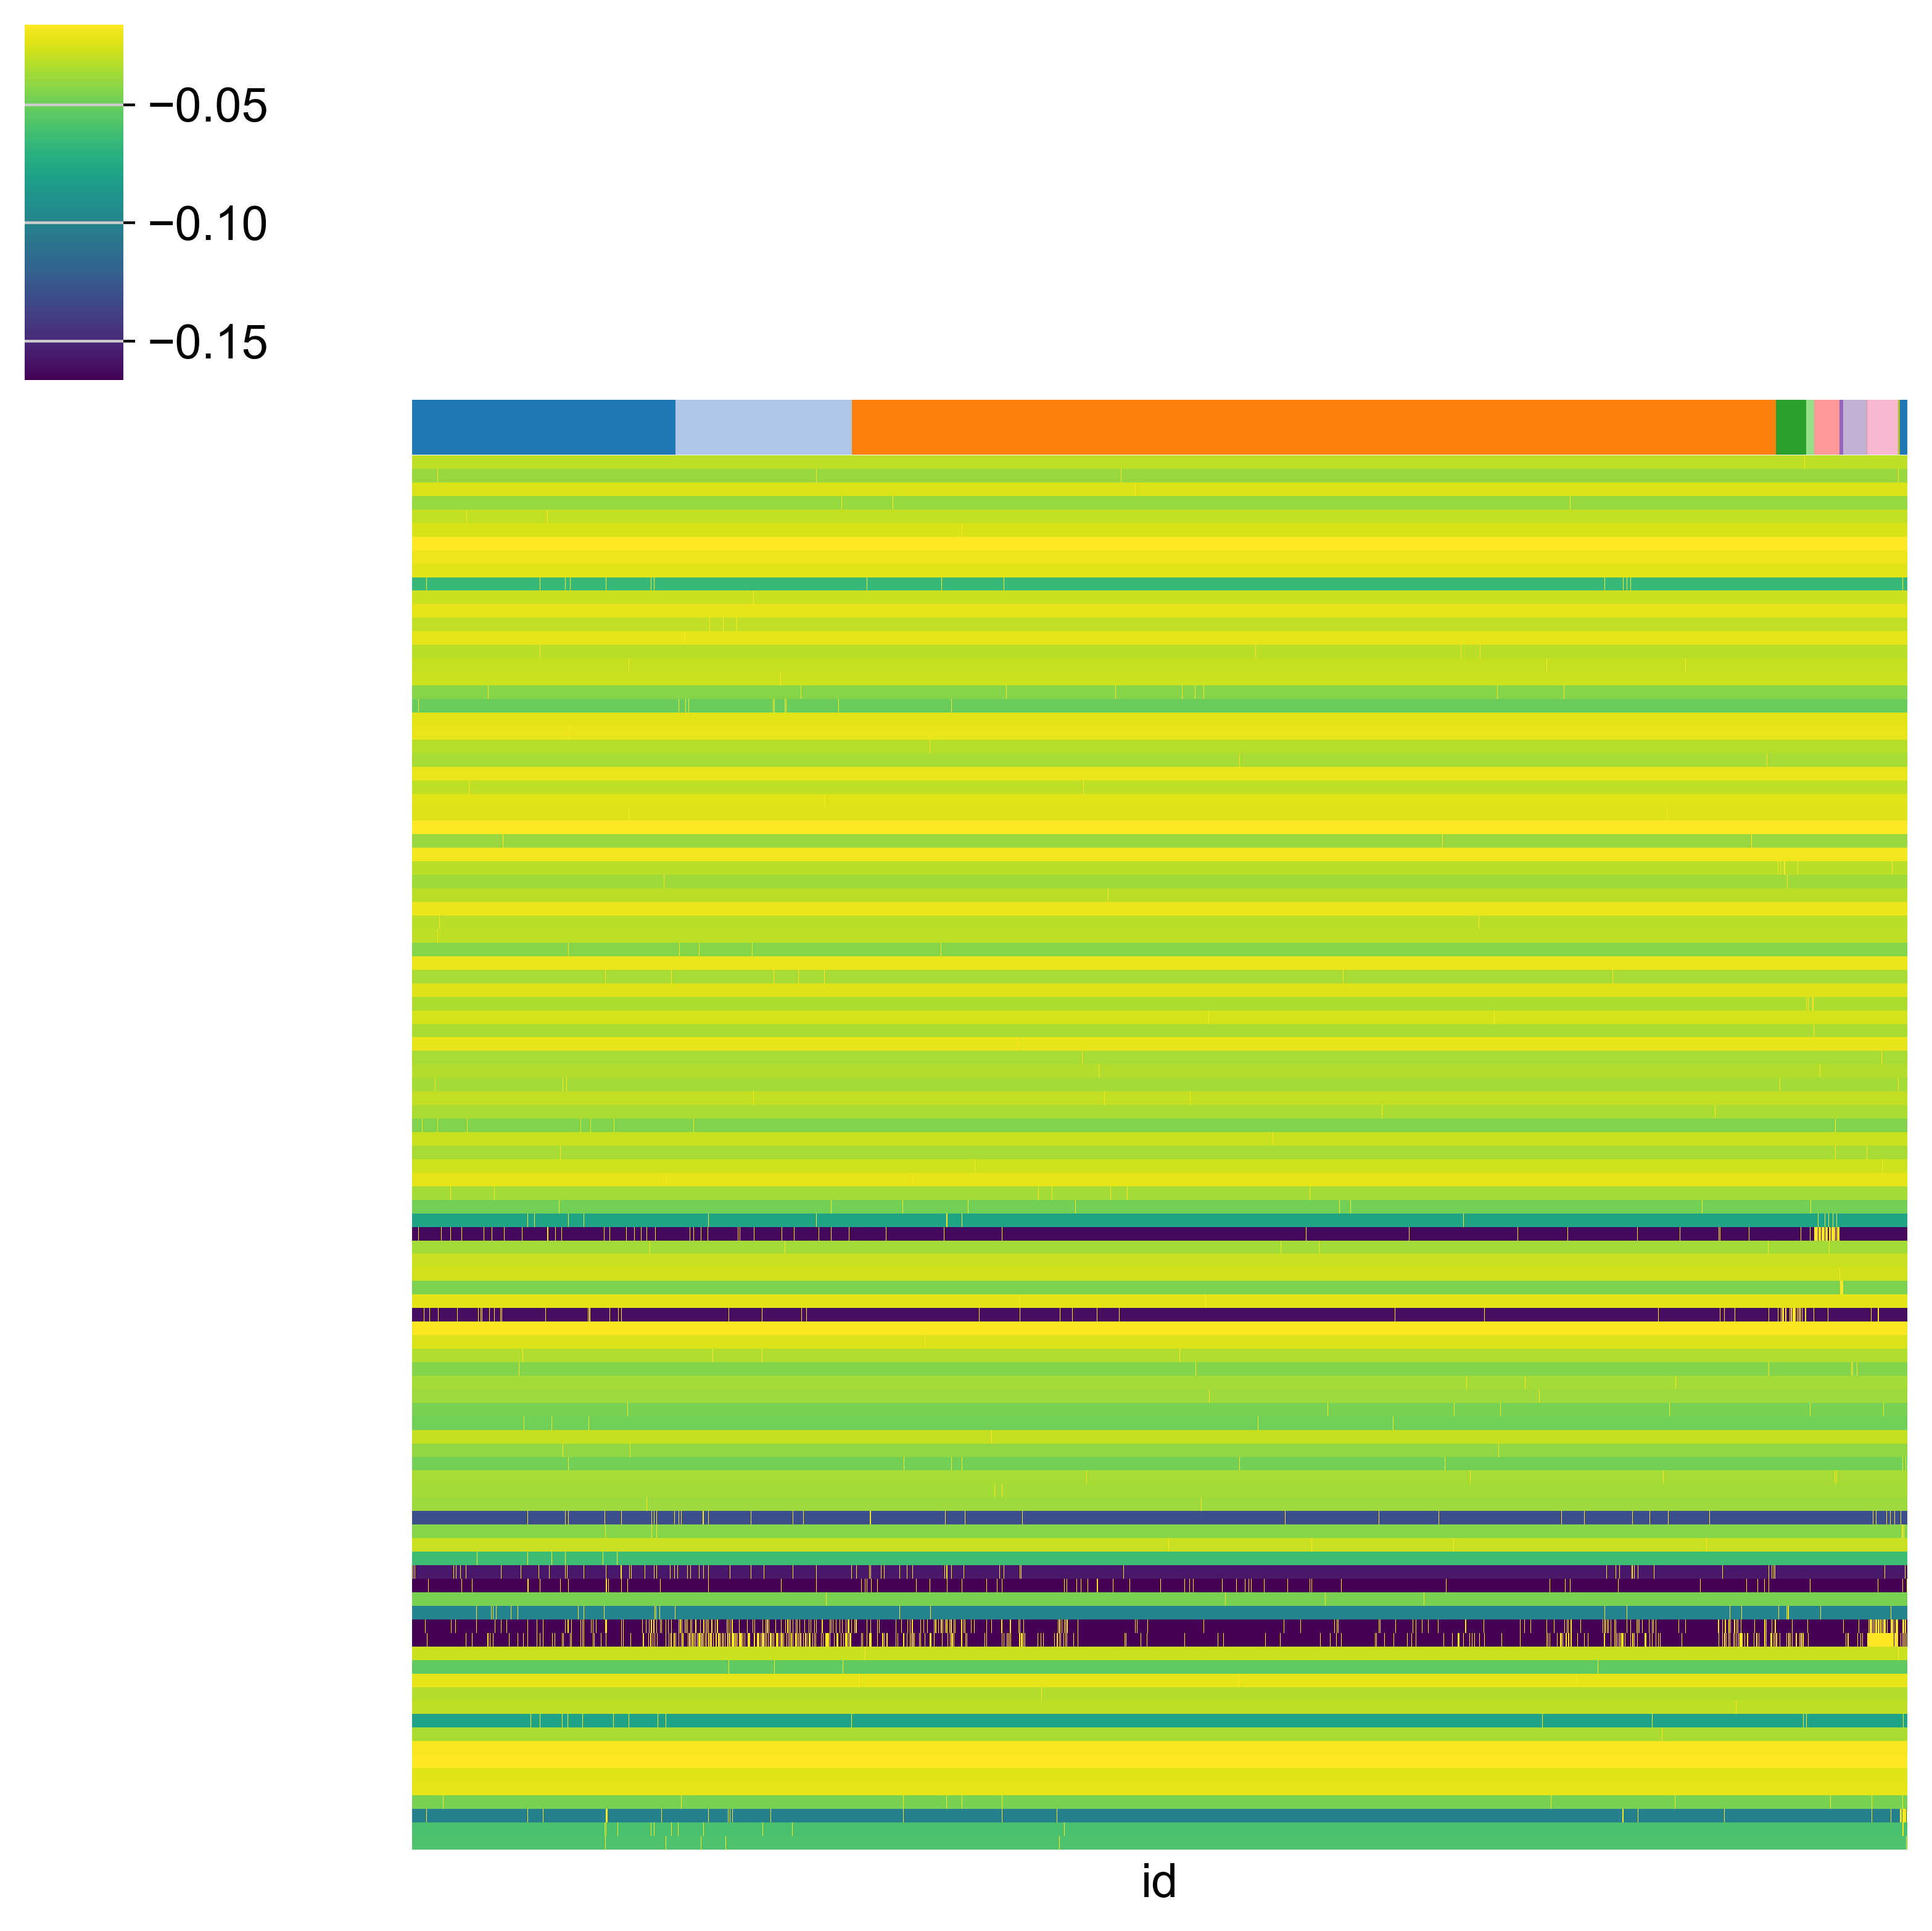

In [117]:
cg_degs=sns.clustermap(adata_markers_df.transpose(),
                           metric="correlation",
                           cmap='viridis',
                        row_cluster=False,
                       col_cluster=False,
                       robust=True,xticklabels=False,figsize=(8,8),
                            yticklabels= False,
               z_score=0,
               #standard_scale=0,
               col_colors=[louvain_col_colors]
              )

In [118]:
cg_degs.savefig('./figures/haematopoiesis_DEGs_heatmap_20250323.tiff',dpi=500)

In [137]:
import numpy as np
import scanpy as sc

# List of genes of interest
genes_of_interest = [
    'CXCL8', 'S100A9', 'SAT1', 'FTH1', 'S100A8', 'G0S2', 
    'TMSB4X', 'LITAF', 'COL1A1', 'MT-CYB'
]

# Perform PCA on the data if not already done (use fewer components to speed up)
if 'X_pca' not in adata_subsampled.obsm:
    sc.tl.pca(adata_subsampled, n_comps=5)  # Reduce to 20 components

# Perform neighbors analysis to set up UMAP
if 'neighbors' not in adata_subsampled.uns:
    sc.pp.neighbors(adata_subsampled, n_neighbors=2, n_pcs=5)  # Set up neighbors for UMAP (use 20 PCs)

# Perform UMAP on the PCA components if not already done
if 'X_umap' not in adata_subsampled.obsm:
    sc.tl.umap(adata_subsampled, n_components=2)  # Perform UMAP on the PCA-reduced data

# Sample a larger fraction of the data (e.g., 1% or 5% of the cells)
sampling_fraction = 0.001  # Try 5% of the cells to speed up UMAP
sampled_cells = np.random.choice(adata_subsampled.obs_names, size=int(len(adata_subsampled) * sampling_fraction), replace=False)
adata_sampled = adata_subsampled[adata_subsampled.obs_names.isin(sampled_cells), :]

# Generate a UMAP for all genes of interest together (in a single plot to avoid multiple slow operations)
sc.pl.umap(
    adata_sampled,
    color=genes_of_interest,  # Plot all genes of interest in the same UMAP
    cmap='viridis_r',  # Use the 'viridis_r' colormap
    save=f'adata_genes_of_interest_sampled_20250323.pdf',  # Save the plot as PDF
    show=True  # Don't show interactively to speed things up
)


computing UMAP


KeyboardInterrupt: 